In [1]:
""" 라이브러리 불러오기 """
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

# QGIS 결과

In [6]:
""" 데이터 불러오기 """
pop_ddm = pd.read_csv('동대문구_고령인구.csv', encoding='cp949')
old_ddm = pd.read_csv('동대문구_노인복지시설.csv', encoding='cp949')
bus_ddm = pd.read_csv('동대문구_버스정류장.csv', encoding='cp949')
met_ddm = pd.read_csv('동대문구_지하철역.csv', encoding='cp949')
bic_ddm = pd.read_csv('동대문구_자전거시설.csv', encoding='cp949')
cen_ddm = pd.read_csv('동대문구_자치센터.csv', encoding='cp949')
mar_ddm = pd.read_csv('동대문구_전통시장.csv', encoding='cp949')

In [7]:
""" 데이터 취합 """
df_ddm = pop_ddm.copy()

df_ddm['노인복지시설개수'] = old_ddm['노인복지시설개수']
df_ddm['버스정류장개수'] = bus_ddm['버스정류장개수']
df_ddm['지하철역개수'] = met_ddm['지하철역개수']
df_ddm['자전거시설개수'] = bic_ddm['자전거시설개수']
df_ddm['자치센터개수'] = cen_ddm['자치센터개수']
df_ddm['전통시장개수'] = mar_ddm['전통시장개수']

In [8]:
print(df_ddm.shape)
df_ddm.head()

(29, 24)


,관리번호,공원명,공원구분,소재지도로,소재지지번,위도,경도,공원면적,공원보유시,공원보유_1,...,관리기관명,전화번호,데이터기준,고령인구,노인복지시설개수,버스정류장개수,지하철역개수,자전거시설개수,자치센터개수,전통시장개수
0,11230-00001,청량,근린공원,NaN,서울특별시 동대문구 청량리동 산1-1,37.595813,127.044027,119871.0,NaN,NaN,...,서울특별시 동대문구청,02-2127-4775,2021/06/25,0,0,1,0,0,0,0
1,11230-00002,우산각,어린이공원,서울특별시 동대문구 천호대로4길 22,서울특별시 동대문구 신설동 109-4,37.573447,127.024430,5294.2,다목적구장,"조합놀이대, 흔들놀이, 그네",...,서울특별시 동대문구청,02-2127-4776,2021/06/25,254,4,5,1,0,0,0
2,11230-00003,느티나무,어린이공원,NaN,서울특별시 동대문구 용두동 138-61,37.579028,127.032549,1719.0,NaN,NaN,...,서울특별시 동대문구청,02-2127-4776,2021/06/25,1474,4,4,1,3,0,1
3,11230-00004,안골,어린이공원,서울특별시 동대문구 천호대로77다길 20,서울특별시 동대문구 장안동 402,37.565348,127.064280,1652.3,NaN,"조합놀이대, 시소, 그네, 흔들놀이, 모래놀이터",...,서울특별시 동대문구청,02-2127-4776,2021/06/25,1693,4,5,0,0,0,0
4,11230-00005,마로니에,어린이공원,NaN,서울특별시 동대문구 장안동 325,37.575010,127.073721,1656.2,NaN,조합놀이대,...,서울특별시 동대문구청,02-2127-4776,2021/06/25,1620,10,7,0,0,0,0


In [27]:
df_ddm.to_csv('동대문구_공원점수.csv', encoding='utf-8-sig', index=None)

# 대중교통 파생변수 생성

In [10]:
df_ddm['대중교통지수'] = (0.9/1.4)*df_ddm['자전거시설개수'] + (0.4/1.4)*df_ddm['지하철역개수'] + (0.1/1.4)*df_ddm['버스정류장개수']

In [11]:
df_ddm[['노인복지시설개수', '버스정류장개수', '지하철역개수', '자전거시설개수', '자치센터개수', '전통시장개수', '대중교통지수']].describe()

,노인복지시설개수,버스정류장개수,지하철역개수,자전거시설개수,자치센터개수,전통시장개수,대중교통지수
count,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000
mean,5.310345,5.827586,0.103448,0.551724,0.37931,0.206897,0.800493
std,3.197135,3.263094,0.309934,1.270158,0.56149,0.412251,0.868207
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.000000,4.000000,0.000000,0.000000,0.00000,0.000000,0.357143
50%,4.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.500000
75%,8.000000,7.000000,0.000000,0.000000,1.00000,0.000000,0.714286
max,12.000000,15.000000,1.000000,4.000000,2.00000,1.000000,3.000000


# minmax scaling

In [12]:
def MinMax(x):
    x_max = x.max()
    x_min = x.min()
    result = (x-x_min)/(x_max-x_min)
    return result

In [13]:
df_ddm['노인복지시설점수'] = list(MinMax(df_ddm['노인복지시설개수']))
df_ddm['자치센터점수'] = list(MinMax(df_ddm['자치센터개수']))
df_ddm['전통시장점수'] = list(MinMax(df_ddm['전통시장개수']))
df_ddm['대중교통점수'] = list(MinMax(df_ddm['대중교통지수']))
df_ddm['고령인구점수'] = list(MinMax(df_ddm['고령인구']))

# 공원별 점수

In [17]:
df_ddm['총점'] = df_ddm['고령인구점수'] + df_ddm['노인복지시설점수'] + df_ddm['대중교통점수'] + df_ddm['자치센터점수'] + df_ddm['전통시장점수']
top3_ddm = df_ddm.sort_values('총점', ascending=False).head(3)
top3_ddm

,관리번호,공원명,공원구분,소재지도로,소재지지번,위도,경도,공원면적,공원보유시,공원보유_1,...,자전거시설개수,자치센터개수,전통시장개수,대중교통지수,노인복지시설점수,자치센터점수,전통시장점수,대중교통점수,고령인구점수,총점
28,11230-00044,휘경2구역(명칭제정중),어린이공원,NaN,서울특별시 동대문구 휘경동 372-2,37.593511,127.067803,3426.3,NaN,"조합놀이대, 시소, 그네, 흔들놀이, 모래놀이터",...,4,1,1,3.000000,0.583333,0.5,1.0,1.000000,0.680180,3.763514
9,11230-00011,장안,근린공원,서울특별시 동대문구 장한로 191,서울특별시 동대문구 장안동 300,37.577396,127.071410,14744.8,"배드민턴장, 족구장, 게이트볼장, 농구장 반코트","조합놀이대, 그네",...,0,1,1,0.642857,0.750000,0.5,1.0,0.214286,0.786486,3.250772
22,11230-00037,아름드리,어린이공원,NaN,서울특별시 동대문구 전농동 688-7,37.579110,127.059684,2626.5,NaN,"조합놀이대, 흔들놀이, 회전놀이, 시소, 모래놀이터",...,0,1,1,0.428571,0.416667,0.5,1.0,0.142857,0.814414,2.873938


In [18]:
df_ddm['총점'].describe() # 평균 1.69

count    29.000000
mean      1.698269
std       0.888180
min       0.023810
25%       1.200450
50%       1.693372
75%       2.255148
max       3.763514
Name: 총점, dtype: float64

In [19]:
top3_ddm['총점'].describe() # 평균 3.29

count    3.000000
mean     3.296075
std      0.446515
min      2.873938
25%      3.062355
50%      3.250772
75%      3.507143
max      3.763514
Name: 총점, dtype: float64

# 시각화

(참고: https://zephyrus1111.tistory.com/63)

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("deep")
plt.rc('font', family='NanumGothic')
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [24]:
df = top3_ddm[['공원명', '고령인구점수', '노인복지시설점수', '대중교통점수', '자치센터점수', '전통시장점수']]
df.reset_index(inplace=True, drop=True)
df

,공원명,고령인구점수,노인복지시설점수,대중교통점수,자치센터점수,전통시장점수
0,휘경2구역(명칭제정중),0.680180,0.583333,1.000000,0.5,1.0
1,장안,0.786486,0.750000,0.214286,0.5,1.0
2,아름드리,0.814414,0.416667,0.142857,0.5,1.0


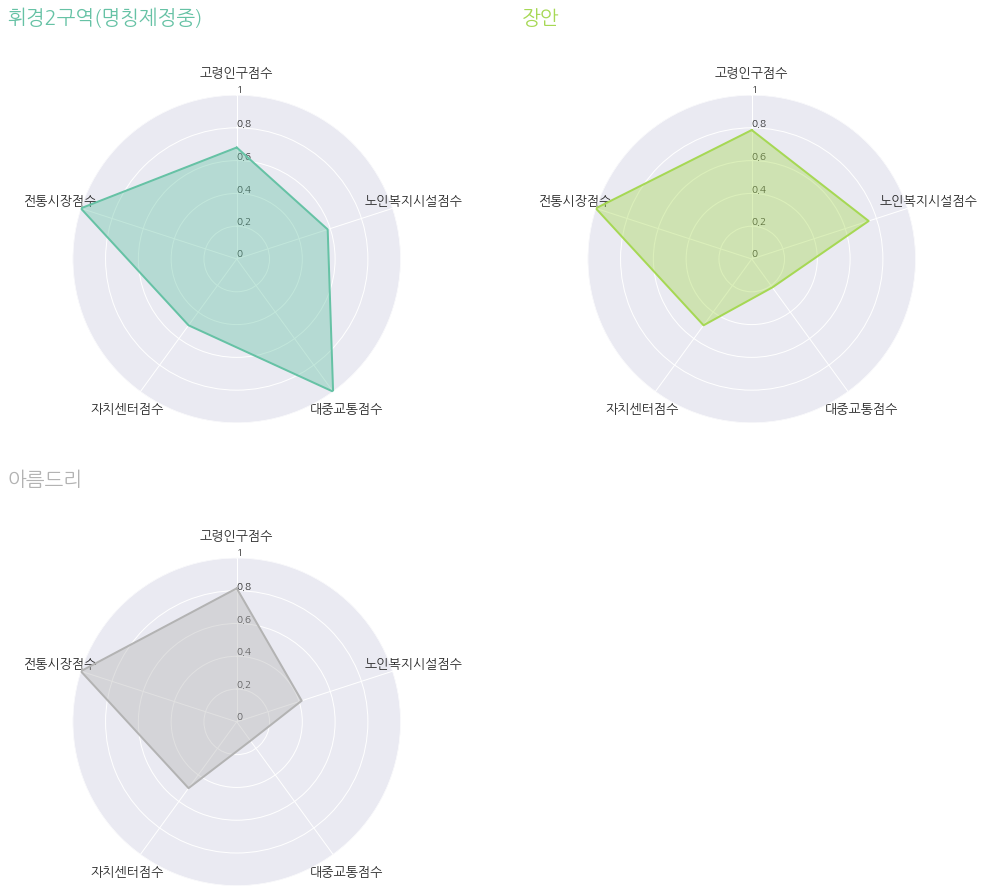

In [25]:
## 따로 그리기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('공원명').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,1],['0','0.2','0.4','0.6','0.8','1'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,1)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.공원명, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

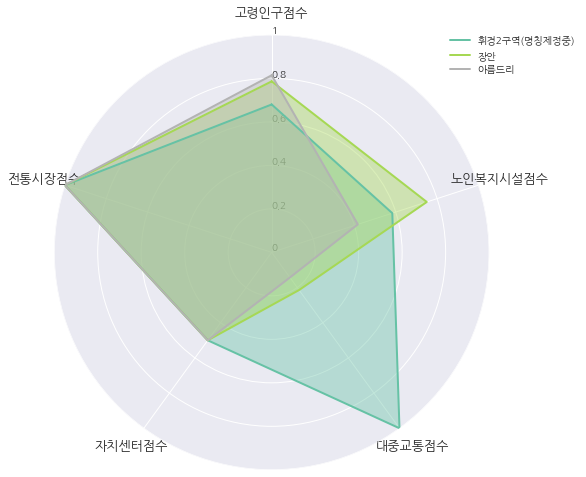

In [26]:
## 하나로 합치기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('공원명').tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,1],['0','0.2','0.4','0.6','0.8','1'], fontsize=10) ## 반지름 축 눈금 설정
    plt.ylim(0,1)

    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.공원명) ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
plt.legend(loc=(0.9,0.9))
plt.show()